# Лабораторная работа 2.1.3.
# Определение $C_p/C_v$ по скорости звука в газе

---

__Цель работы:__ 
1) Измерение частоты колебаний и длины волны при резонансе звуковых колебаний в газе, заполняющем трубу
2) Определение показателя адиабаты с помощью уравнения состояния идеального газа

## Теория


Воздух можно приближенно считать идеальным газом

Скорость звука в газах определяется формулой:
$$c = \sqrt{\gamma\frac{RT}{\mu}}$$

$$\gamma = \frac{\mu}{RT}c^2
$$

$$c = \lambda \nu$$

Если возбудить звуковые колебания в трубе и добиться возникновения стоячих волн, то можно таким образом измерить скорость звука

### Опыт 1 - с неподвижной трубой

Запишем длину трубы и будем подбирать частоту генератора так, чтобы в трубе возникали стоячие волны.

$$L = \frac{\lambda_1}{2}n = ... = \frac{\lambda_{k+1}}{2}(n+k)$$

$$\nu_{k+1} = \frac{c}{\lambda_{k+1}} = \frac{c}{2L}(n+k) = \nu_1 + \frac{c}{2L}k$$

Таким образом, на графике $\nu(k)$ угловой коэффициент $\alpha = c/2L$, откуда можно получить c

Скорость звука будем измерять для разных температур

## Ход работы

---

In [148]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [149]:
# КОНСТАНТЫ
RHO_WATER = 1000 # кг/м^3
g         = 9.8  # м/с^2

c_sound_0 = 340 # м/с
L = 0.7         # м
delta_L = 0.001 # м

T_0 = 21.6 + 273.15# K
delta_nu_measured = 2 # Гц

In [150]:
def calc_nu_n (n, c_sound):
    return c_sound / 2 / L + (n - 1) * c_sound / 2 / L

In [151]:
def calc_c_sound (T):
    return c_sound_0 * math.sqrt(T/T_0)

In [152]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [153]:
def get_graph_2 (nu_measured, Temperature):
    plt.figure()
    plt.xlabel("$k$ - номер гармоники")
    plt.ylabel("$ \\nu $ - резонансная частота")
    plt.title('График зависимости $\\nu(k), T = ' + str(Temperature) + 'K $')
    plt.grid(True, linestyle = '--')
    plt.errorbar(range(1, 6), [nu_measured[i] - nu_measured[0] for i in range(0,5)], yerr=[delta_nu_measured]*5, fmt=".k", label="Экспериментальные точки")

    x = np.array([1, 6])

    k, b, kerr, berr = LeastSquares(range(1,6), [nu_measured[i] - nu_measured[0] for i in range(0,5)])
    plt.plot(x, k*x + b, "-r", linewidth = 1)
    return k, kerr, b, berr

In [154]:
T_1 = T_0
nu_n_1_measured = [263, 497, 740, 988, 1233]

T_2 = 30.1 + 273.15 # k
nu_n_2_measured = [265, 503, 749, 999, 1249]

T_3 = 40.1 + 273.15 # k
nu_n_3_measured = [269, 511, 761, 1014, 1268]

T_4 = 50.1 + 273.15 # k
nu_n_4_measured = [272, 519, 771, 1031, 1287]

(340.34000000000003, 2.143390718774213, 0.006297792556779141)

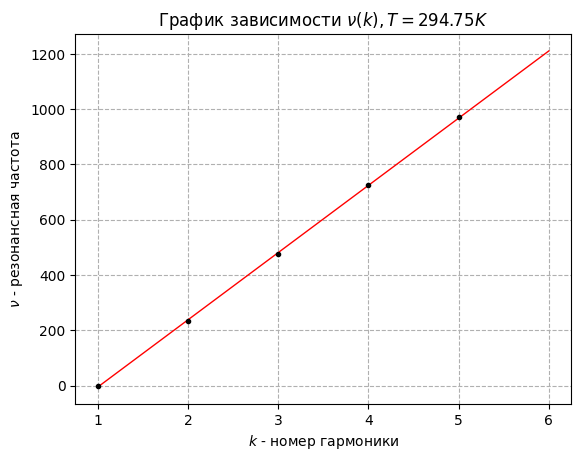

In [155]:
k, kerr, b, berr = get_graph_2 (nu_n_1_measured, T_1)
k * 2 * L, np.sqrt((2 * L * kerr)**2 + (2 * k * delta_L)**2), np.sqrt((2 * L * kerr)**2 + (2 * k * delta_L)**2) / (k * 2 * L)

(344.9599999999999, 2.078377213119151, 0.0060249803256005085)

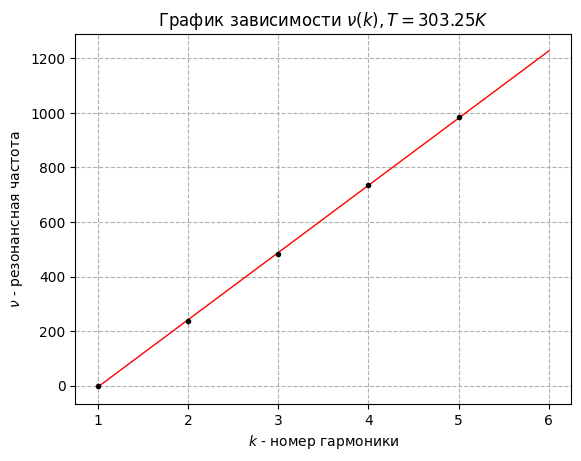

In [156]:
k, kerr, b, berr = get_graph_2 (nu_n_2_measured, T_2)
k * 2 * L, np.sqrt((2 * L * kerr)**2 + (2 * k * delta_L)**2), np.sqrt((2 * L * kerr)**2 + (2 * k * delta_L)**2) / (k * 2 * L)

(350.1399999999999, 1.9951775292831788, 0.0056982279353492305)

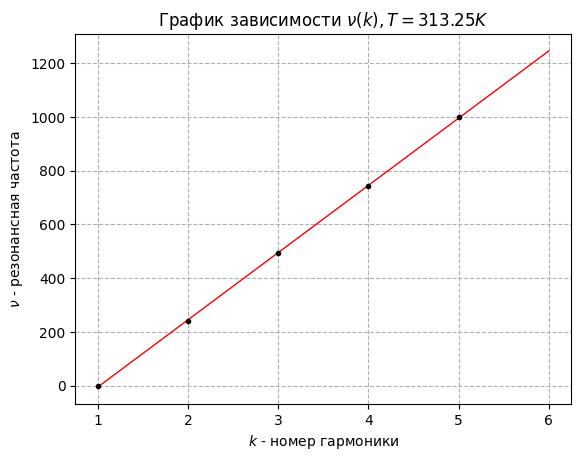

In [157]:
k, kerr, b, berr = get_graph_2 (nu_n_3_measured, T_3)
k * 2 * L, np.sqrt((2 * L * kerr)**2 + (2 * k * delta_L)**2), np.sqrt((2 * L * kerr)**2 + (2 * k * delta_L)**2) / (k * 2 * L)

(355.88000000000005, 2.037728447722264, 0.005725886387889918)

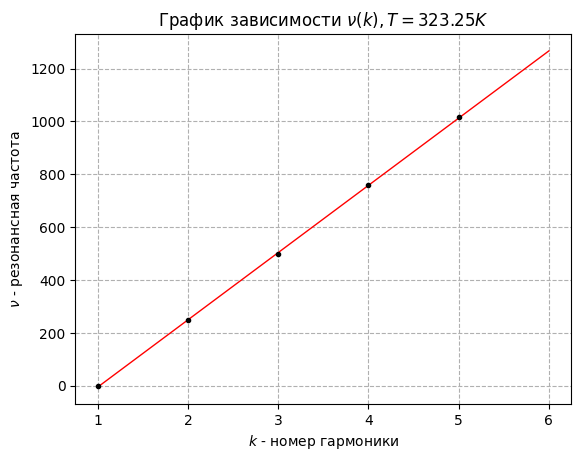

In [158]:
k, kerr, b, berr = get_graph_2 (nu_n_4_measured, T_4)
k * 2 * L, np.sqrt((2 * L * kerr)**2 + (2 * k * delta_L)**2), np.sqrt((2 * L * kerr)**2 + (2 * k * delta_L)**2) / (k * 2 * L)

In [159]:
mu_air = 0.029 # кг/моль
Ts = [T_1, T_2, T_3, T_4]
cs = [340.34, 344.96, 350.14, 355.88]
sigmas_c = [2.574, 2.512, 2.432, 2.482]
gammas = [mu_air/8.31/Ts[i]*pow(cs[i], 2) for i in range(4)]
sigmas_gamma = [2 * mu_air/8.31/Ts[i] * cs[i] * sigmas_c[i] for i in range(4)]
gammas, sigmas_gamma

([1.3714158023738732,
  1.3694104665958333,
  1.3658070473078807,
  1.367305637259966],
 [0.02074410457372245,
  0.019944104198102584,
  0.01897322636118562,
  0.01907189272608315])

### Часть 2

In [160]:
L = 0.57 # м
delta_L = 0.005 # м

nu_1 = 4110 # гц

In [161]:
l = [0.185, 0.145, 0.102, 0.06, 0.018]
ls = [l[i] + L - l[0] for i in range(len(l))]
ls.sort()
ls

[0.40299999999999997,
 0.4449999999999999,
 0.48699999999999993,
 0.53,
 0.5699999999999998]

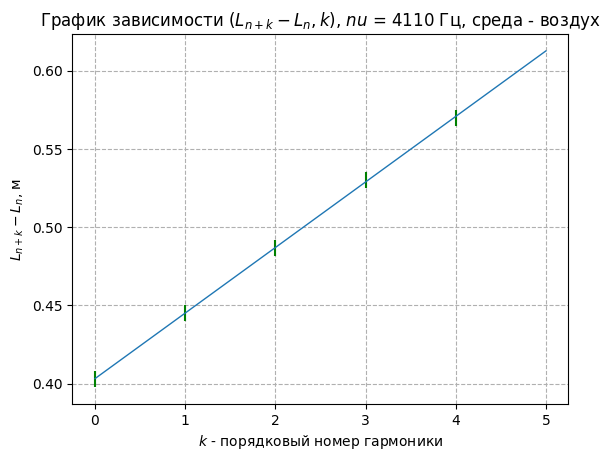

344.41799999999995

In [162]:
plt.figure()
plt.xlabel("$k$ - порядковый номер гармоники")
plt.ylabel("$L_{n+k}-L_n$, м")
plt.title('График зависимости $(L_{n+k}-L_n, k)$, $nu$ = 4110 Гц, среда - воздух')
plt.grid(True, linestyle = '--')
plt.errorbar(range(len(l)), ls, yerr=[np.sqrt(delta_L**2 + 0.001**2) for i in range(len(ls))], color = 'g', ls = "None")
k, b, kerr, berr = LeastSquares (range(len(l)), ls)
x = np.array ([0, len(l)])
plt.plot (x, k*x + b, "-", linewidth = 1)
plt.show()
k*2, 2*kerr, kerr / k
c_4110 = k*2 * 4110
sigma_c_4110 = kerr*2 * 4110
c_4110

перешли на CO2

In [163]:
c_sound_CO2 = c_sound_0 * 29 / 44
c_sound_CO2


224.0909090909091

In [164]:
nu_2 = 2110 # Гц

In [165]:
l_CO2_1 = [0.20, 0.144, 0.08, 0.016]
l_CO2_1.sort()
arrT_cool = [l_CO2_1[i] + L - l_CO2_1[0] for i in range(len(l_CO2_1))]
arrT_cool

[0.57, 0.6339999999999999, 0.698, 0.754]

1:  0.12320000000000011 0.0027712812921162153 259.9520000000002 5.847403526365214 0.022494166332112115
[0.029, 0.087, 0.137, 0.177]
2:  0.0987999999999996 0.005699122739499472 246.999999999999 14.24780684874868 0.057683428537444285


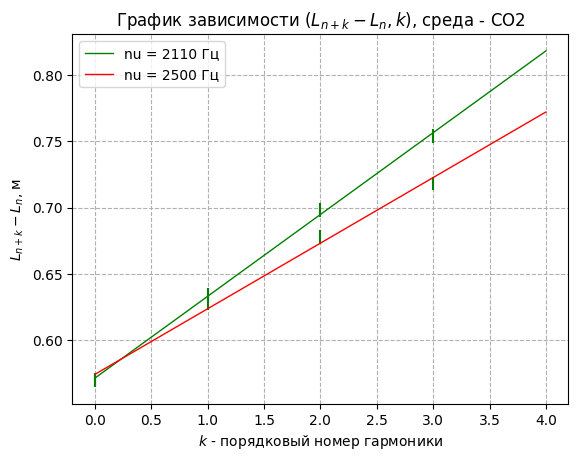

In [166]:
plt.figure()
plt.xlabel("$k$ - порядковый номер гармоники")
plt.ylabel("$L_{n+k}-L_n$, м")
plt.title('График зависимости $(L_{n+k}-L_n, k)$, среда - CO2')
plt.grid(True, linestyle = '--')

l_CO2_1 = [0.20, 0.144, 0.08, 0.016]
l_CO2_1.sort()

arrT_cool = [l_CO2_1[i] + L - l_CO2_1[0] for i in range(len(l_CO2_1))]

plt.errorbar(range(len(arrT_cool)), arrT_cool, yerr=[np.sqrt(delta_L**2 + 0.001**2) for i in range(len(arrT_cool))], color = 'g', ls = "None")
k, b, kerr, berr = LeastSquares (range(len(arrT_cool)), arrT_cool)
x = np.array ([0, len(arrT_cool)])
plt.plot (x, k*x + b, "-", linewidth = 1, color='g', label='nu = 2110 Гц')
print("1: ", k*2, kerr*2, k*2*2110, kerr*2*2110, kerr/k)
c_2110 = k*2*2110
sigma_c_2110 = kerr*2*2110

l_CO2_4 = [0.177, 0.137, 0.087, 0.029]
l_CO2_4.sort()

arrT_cool = [l_CO2_4[i] + L - l_CO2_4[0] for i in range(len(l_CO2_4))]
print(l_CO2_4)
plt.errorbar(range(len(arrT_cool)), arrT_cool, yerr=[np.sqrt(delta_L**2 + 0.001**2) for i in range(len(arrT_cool))], color = 'g', ls = "None")
k, b, kerr, berr = LeastSquares (range(len(arrT_cool)), arrT_cool)
x = np.array ([0, len(arrT_cool)])
plt.plot (x, k*x + b, "-", linewidth = 1, color='r', label='nu = 2500 Гц')
print("2: ", k*2, kerr*2, k*2*2500, kerr*2*2500, kerr/k)
c_2500 = k*2*2500
sigma_c_2500 = kerr*2*2500

plt.legend()
plt.show()


In [167]:
gamma_4110 = 0.029/8.31/294.75 * c_4110**2
sigma_gamma_4110 = 2 * 0.029/8.31/294.75 * c_4110 * sigma_c_4110
gamma_4110, sigma_gamma_4110, sigma_gamma_4110 / gamma_4110

(1.404477678669128, 0.01687123936621064, 0.012012465290439998)

In [176]:
gamma_2110 = 0.044/8.31/294.75 * c_2110**2
sigma_gamma_2110 = 2 * 0.029/8.31/294.75 * c_2110 * sigma_c_2110
gamma_2110, sigma_gamma_2110, sigma_gamma_2110 / gamma_2110

(1.2139035044183786, 0.03599393967482288, 0.029651401074147793)

In [177]:
gamma_2500 = 0.044/8.31/294.75 * c_2500**2
sigma_gamma_2500 = 2 * 0.029/8.31/294.75 * c_2500 * sigma_c_2500
gamma_2500, sigma_gamma_2500, sigma_gamma_2500 / gamma_2500

(1.0959525347818586, 0.08333321326795853, 0.07603724670844929)

In [170]:
nu_3 = 3110 # Гц

In [171]:
l_CO2_2 = [0.15, 0.08]

In [172]:
nu_4 = 1110 # Гц

In [173]:
l_CO2_3 = [0.144, 0.035]

In [174]:
nu_5 = 2500 # Гц

In [175]:
l_CO2_4 = [0.177, 0.137, 0.087, 0.029]